In [5]:
#Project Bank Churn prediction Model
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [6]:
data=pd.read_csv('Churn_Modelling.csv')

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [11]:
data.shape

(10000, 14)

In [12]:
data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [15]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
data=pd.get_dummies(data,drop_first=True)

In [18]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [19]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='count'>

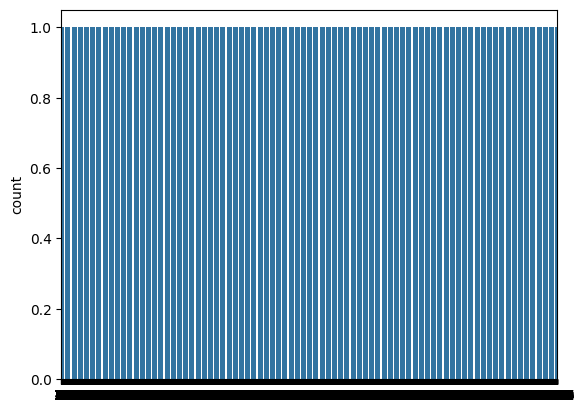

In [20]:
sns.countplot(data['Exited'])

In [21]:
X=data.drop('Exited',axis=1)

In [22]:
y=data['Exited']

In [23]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [24]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [61]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [64]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc=StandardScaler()

In [67]:
X_train=sc.fit_transform(X_train)

In [68]:
X_test=sc.transform(X_test)

In [33]:
X_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

In [34]:
#Logistic regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
log=LogisticRegression()

In [71]:
log.fit(X_train,y_train)

LogisticRegression()

In [75]:
y_pred1=log.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_test,y_pred1)

0.7655367231638418

In [79]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [47]:
precision_score(y_test,y_pred1)

0.5891472868217055

In [80]:
#after SMOTE
precision_score(y_test,y_pred1)

0.7616883116883116

In [48]:
recall_score(y_test,y_pred1)

0.18673218673218672

In [81]:
#after Smote
recall_score(y_test,y_pred1)

0.7553122987765615

In [50]:
f1_score(y_test,y_pred1)

0.2835820895522388

In [82]:
#After SMOTE
f1_score(y_test,y_pred1)

0.7584869059165859

In [83]:
# SVC

In [88]:
from sklearn import svm

In [89]:
svm = svm.SVC()

In [90]:
svm.fit(X_train,y_train)

SVC()

In [91]:
y_pred2=svm.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred2)

0.8386691776522285

In [93]:
precision_score(y_test,y_pred2)

0.8438120450033091

In [94]:
f1_score(y_test,y_pred2)

0.8322454308093995

In [95]:
#KNeighbour Classifier

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn= KNeighborsClassifier()

In [100]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [101]:
y_pred3=knn.predict(X_test)

In [102]:
accuracy_score(y_test,y_pred3)

0.8185812931575643

In [103]:
precision_score(y_test,y_pred3)

0.8083491461100569

In [104]:
f1_score(y_test,y_pred3)

0.8155711550733886

In [105]:
# Decision tree classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
dt=DecisionTreeClassifier()

In [109]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [110]:
y_pred4= dt.predict(X_test)

In [111]:
accuracy_score(y_test,y_pred4)

0.7988072818581293

In [113]:
precision_score(y_test,y_pred4)

0.7860727728983689

In [114]:
# Randomforest classifier


In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rf=RandomForestClassifier()

In [117]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [118]:
y_pred5=rf.predict(X_test)

In [119]:
accuracy_score(y_test,y_pred5)

0.867231638418079

In [120]:
precision_score(y_test,y_pred5)

0.8697643979057592

In [121]:
f1_score(y_test,y_pred5)

0.8627069133398247

In [122]:
# Gradient Boosting Classifier

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

In [124]:
gbc=GradientBoostingClassifier()

In [125]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [126]:
y_pred6=gbc.predict(X_test)

In [127]:
accuracy_score(y_test,y_pred6)

0.8380414312617702

In [128]:
precision_score(y_test,y_pred6)

0.8426966292134831

In [129]:
f1_score(y_test,y_pred6)

0.8317025440313112

In [130]:
# Final decision of model

In [139]:
final_data = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
    'ACC': [
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4),
        accuracy_score(y_test, y_pred5),
        accuracy_score(y_test, y_pred6)
    ]
})

In [140]:
final_data

,Models,ACC
0,LR,0.765537
1,SVC,0.838669
2,KNN,0.818581
3,DT,0.798807
4,RF,0.867232
5,GBC,0.838041


In [145]:
import seaborn as sns
#sns.barplot(final_data['Models'],final_data['ACC'])

<Axes: xlabel='Models', ylabel='ACC'>

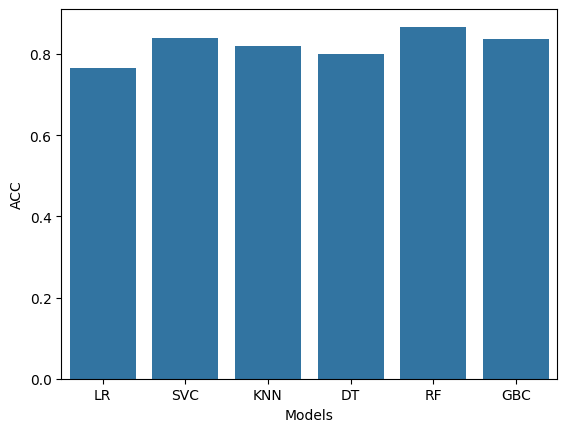

In [146]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [148]:
final_data2 = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
    'PRE': [
        precision_score(y_test, y_pred1),
        precision_score(y_test, y_pred2),
        precision_score(y_test, y_pred3),
        precision_score(y_test, y_pred4),
        precision_score(y_test, y_pred5),
        precision_score(y_test, y_pred6)
    ]
})

In [149]:
final_data2

,Models,PRE
0,LR,0.761688
1,SVC,0.843812
2,KNN,0.808349
3,DT,0.786073
4,RF,0.869764
5,GBC,0.842697


<Axes: xlabel='Models', ylabel='PRE'>

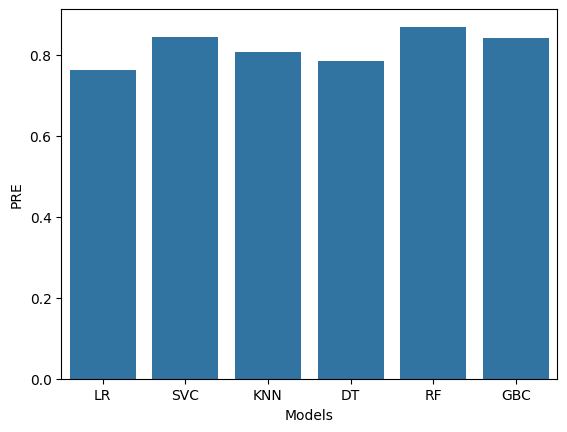

In [150]:
sns.barplot(x='Models', y='PRE', data=final_data2)

In [151]:
# save the model


In [152]:
X_res=sc.fit_transform(X_res)

In [153]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [154]:
import joblib

In [155]:
joblib.dump(rf,'Churn_predict_Model_project')

['Churn_predict_Model_project']

In [159]:
model=joblib.load('Churn_predict_Model_project')

In [160]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)